In [21]:
# Importing the necessary packages
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [13]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
data = yf.download(tickers, start="2019-01-01", end="2024-01-01")

[*********************100%***********************]  5 of 5 completed


## Some Briefs on our Data:

Using Yahoo Finance package, we are zooming in on the recent historical daily stock price (2019 - 2024)data from Yahoo Finance for:
- AAPL: Apple Inc

- MSFT: Microsoft Corporation

- GOOGL: Alphabet Inc. (Google)

- AMZN: Amazon.com, Inc.

- META: Meta Platforms, Inc. (formerly Facebook)

Where columns are defined as follows:
- Open:	The price at which the stock opened trading on that day.
- High:	The highest price the stock traded at during the day.
- Low:	The lowest price the stock traded at during the day.
- Close: The last traded price before the market closed.
- Volume: The total number of shares traded that day.


What we can do with the data using the Principal Component Analysis might by the follows:

- Portfolio Diversification: Identify which stocks move together — useful for risk hedging.
- Noise Filtering: Remove small-variance PCs to reduce high-frequency market noise.

### Please let me know if you guys have any other great ideas!

In [14]:
data


Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2019-01-02   37.667187   76.956497   52.483082  135.043533   95.119843   
2019-01-03   33.915264   75.014000   51.029530  131.122025   91.620552   
2019-01-04   35.363071   78.769501   53.647011  137.302902   95.881744   
2019-01-07   35.284370   81.475502   53.540031  137.402435   96.004028   
2019-01-08   35.956993   82.829002   54.010281  141.861404   96.700142   
...                ...         ...         ...         ...         ...   
2023-12-22  192.444595  153.419998  140.816757  351.732300  371.055725   
2023-12-26  191.897858  153.410004  140.846619  353.165527  371.134949   
2023-12-27  191.997253  153.339996  139.702072  356.151459  370.550507   
2023-12-28  192.424698  153.380005  139.562759  356.639191  371.749115   
2023-12-29  191.380966  151.940002  139.025330  352.299591  372.501984   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT  ...   
Date                                                                    ...   
2019-01-02   37.889013   77.667999   52.787128  136.864951   95.712458  ...   
2019-01-03   34.757242   76.900002   53.059326  136.526546   94.245002  ...   
2019-01-04   35.432244   79.699997   53.743052  137.352671   96.427330  ...   
2019-01-07   35.499041   81.727997   53.877415  138.218581   97.142229  ...   
2019-01-08   36.212212   83.830498   54.407380  142.468544   97.800716  ...   
...                ...         ...         ...         ...         ...  ...   
2023-12-22  194.243791  154.350006  141.314378  355.524425  371.650086  ...   
2023-12-26  192.732841  153.979996  142.001088  355.305466  373.393496  ...   
2023-12-27  192.345171  154.779999  141.403942  357.315984  371.531182  ...   
2023-12-28  193.498254  154.080002  140.468433  360.202384  372.918006  ...   
2023-12-29  193.239801  153.889999  139.692140  358.311266  373.611441  ...   

Price             Open                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2019-01-02   36.944469   73.260002   51.115619  128.384928   93.643002   
2019-01-03   34.342215   76.000504   52.283536  134.058183   94.160339   
2019-01-04   34.473390   76.500000   51.879958  133.381382   93.802881   
2019-01-07   35.468032   80.115501   53.791329  136.914728   95.608952   
2019-01-08   35.673153   83.234497   54.041629  139.233789   96.925899   
...                ...         ...         ...         ...         ...   
2023-12-22  194.015153  153.770004  140.100182  353.911999  370.164199   
2023-12-26  192.454513  153.559998  140.916278  353.324780  371.471746   
2023-12-27  191.341204  153.559998  140.916268  354.399735  370.174077   
2023-12-28  192.981353  153.720001  140.110145  358.012722  371.838265   
2023-12-29  192.742785  153.100006  138.965618  357.305994  372.462352   

Price          Volume                                           
Ticker           AAPL       AMZN     GOOGL      META      MSFT  
Date                                                            
2019-01-02  148158800  159662000  31868000  28146200  35329300  
2019-01-03  365248800  139512000  41960000  22717900  42579100  
2019-01-04  234428400  183652000  46022000  29002100  44060600  
2019-01-07  219111200  159864000  47446000  20089300  35656100  
2019-01-08  164101200  177628000  35414000  26263800  31514400  
...               ...        ...       ...       ...       ...  
2023-12-22   37122800   29480100  26514600  11764200  17091100  
2023-12-26   28919300   25067200  16780300   9898600  12673100  
2023-12-27   48087700   31434700  19628600  13207900  14905400  
2023-12-28   34049900   27057000  16045

### Sample Code Up 1:  Portfolio Diversificaition

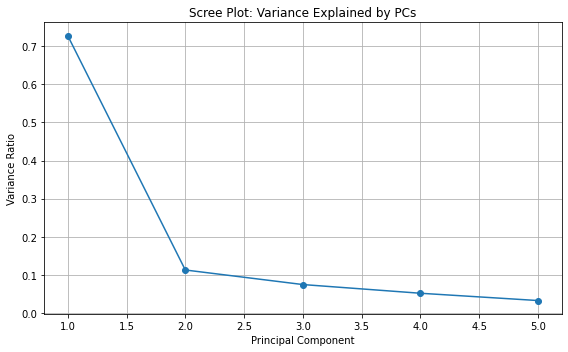

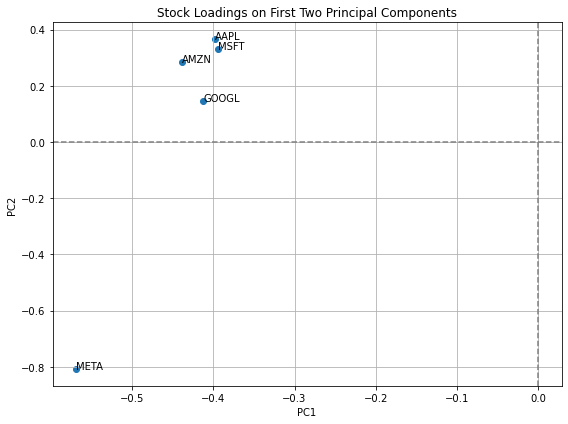

In [24]:
data_closing = data['Close'].dropna()
data_closing

# Compute daily returns
returns = data_closing.pct_change().dropna()
# Fit PCA
pca = PCA()
pca.fit(returns)

# Transform returns
pca_components = pca.transform(returns)
explained = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title('Scree Plot: Variance Explained by PCs')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


# Stock loadings on PC1 & PC2
loadings = pd.DataFrame(pca.components_.T, index=returns.columns, columns=[f'PC{i+1}' for i in range(len(returns.columns))])
plt.figure(figsize=(8, 6))
plt.scatter(loadings['PC1'], loadings['PC2'])

for i in loadings.index:
    plt.text(loadings['PC1'][i], loadings['PC2'][i], i)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Stock Loadings on First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()

### Sample Code Up 2: Noise filtering

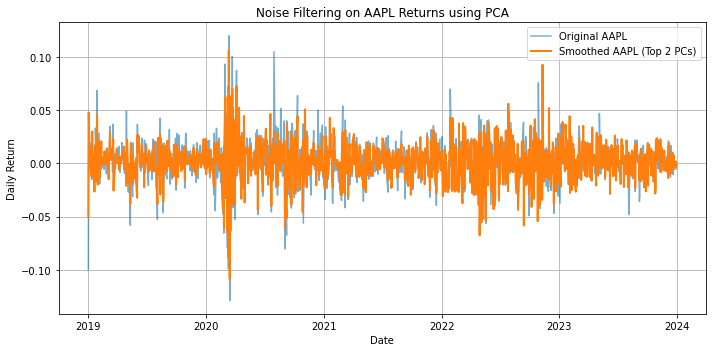

In [26]:
# Refit PCA using only top 2 components
pca_2 = PCA(n_components=2)
pca_2.fit(returns)

# Project and reconstruct
pca_proj_2 = pca_2.transform(returns)
returns_smoothed = pca_2.inverse_transform(pca_proj_2)

# Convert to DataFrame
returns_smoothed_df = pd.DataFrame(returns_smoothed, index=returns.index, columns=returns.columns)

# Plot: Original vs. Smoothed returns for AAPL
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(returns.index, returns['AAPL'], alpha=0.6, label='Original AAPL')
plt.plot(returns_smoothed_df.index, returns_smoothed_df['AAPL'], label='Smoothed AAPL (Top 2 PCs)', linewidth=2)
plt.title('Noise Filtering on AAPL Returns using PCA')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### In reality we willl need more stocks than just 5